## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

Perform wine segmentation.

### b) Defining the Metric for Success

The project will be a success when we are able to create clusters with clear boundaries.

### c) Understanding the Context 

Champagne Company is a leading wine company that specialises in the importation and
distribution of premium and super-premium wines, champagnes and spirits within the
East African region. The main goal of the company is to make the most exclusive brands
of wine more accessible at an affordable price. The company wants to satisfy the
growing local demand for specialised products and the ever-increasing tourism industry
where guests don ́t want to settle for less.

### d) Recording the Experimental Design

- Define the Research Question
- Data Importation
- Data Exploration
- Data Cleaning
- Data Analysis (Univariate and Bivariate)
- Data Preparation
- Data Modeling
- Model Evaluation
- Recommendations / Conclusion
- Challenging your Solution

### e) Data Relevance

The dataset is appropriate to answering the research question.

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)

In [ ]:
df = pd.read_csv('datasets_626341_1116242_wine-clustering.csv')
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [ ]:
# check dataset shape
df.shape

(178, 13)

In [ ]:
# chekc data types
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [ ]:
# dropping duplicates, if any
df.drop_duplicates(inplace = True)
df.shape

(178, 13)

In [ ]:
# check for missing data
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

## <font color='#2F4F4F'>3. Data Analysis</font>

In [ ]:
# get descriptive statistics
df.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

What do you notice about the descriptive statistics, particularly the ranges? What does this tell you?

For most of the variables the valuse are not that far apart from the mean and they have small range value

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

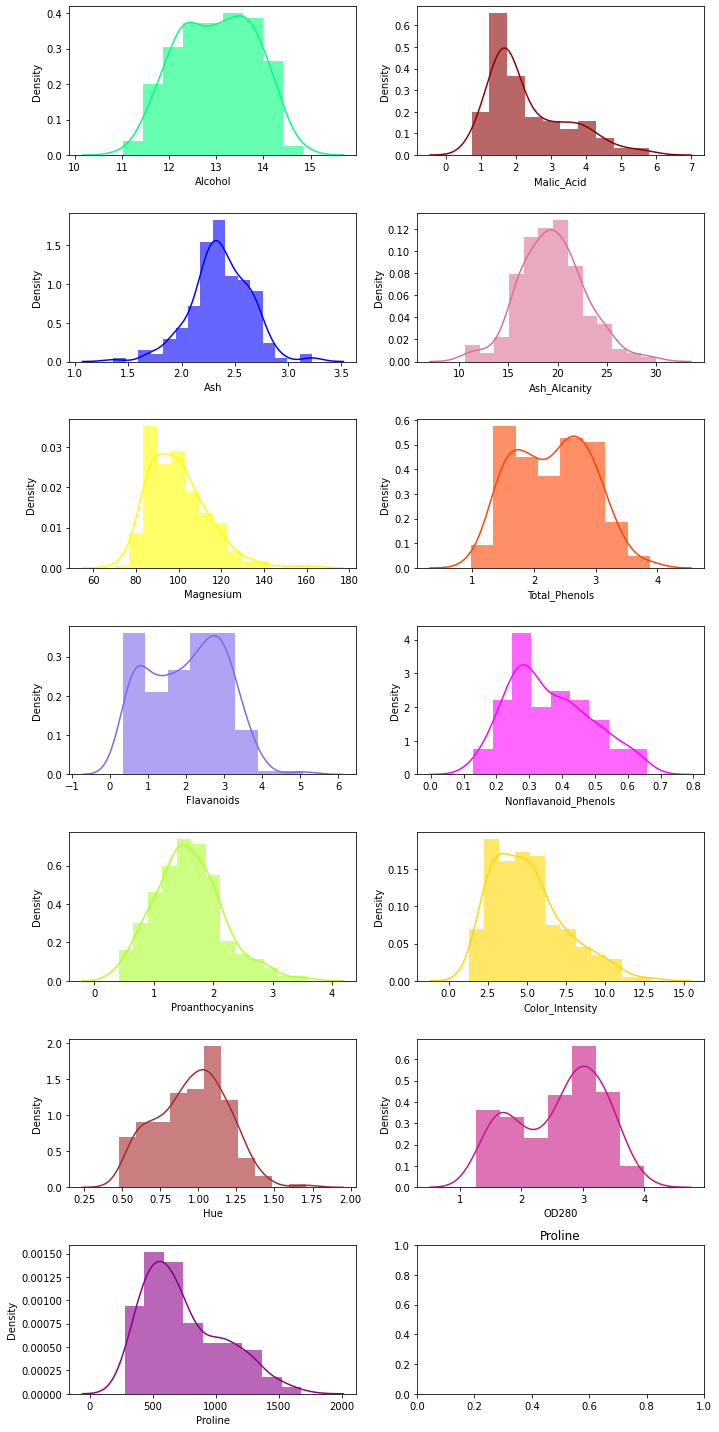

In [ ]:
# previewing the histograms of each variable
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize = (10, 20))

cols = df.columns.to_list()
colors = ['#00FF7F', '#8B0000', '#0000FF', '#DB7093', '#FFFF00', '#FF4500', '#7B68EE', '#FF00FF',
          '#ADFF2F', '#FFD700', '#A52A2A', '#C71585', '#8B008B']

for col, color, ax in zip(cols, colors, axes.flatten()):
    sns.distplot(df[col], ax = ax, color = color, hist_kws = dict(alpha = 0.6))
    plt.title(col)
    
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

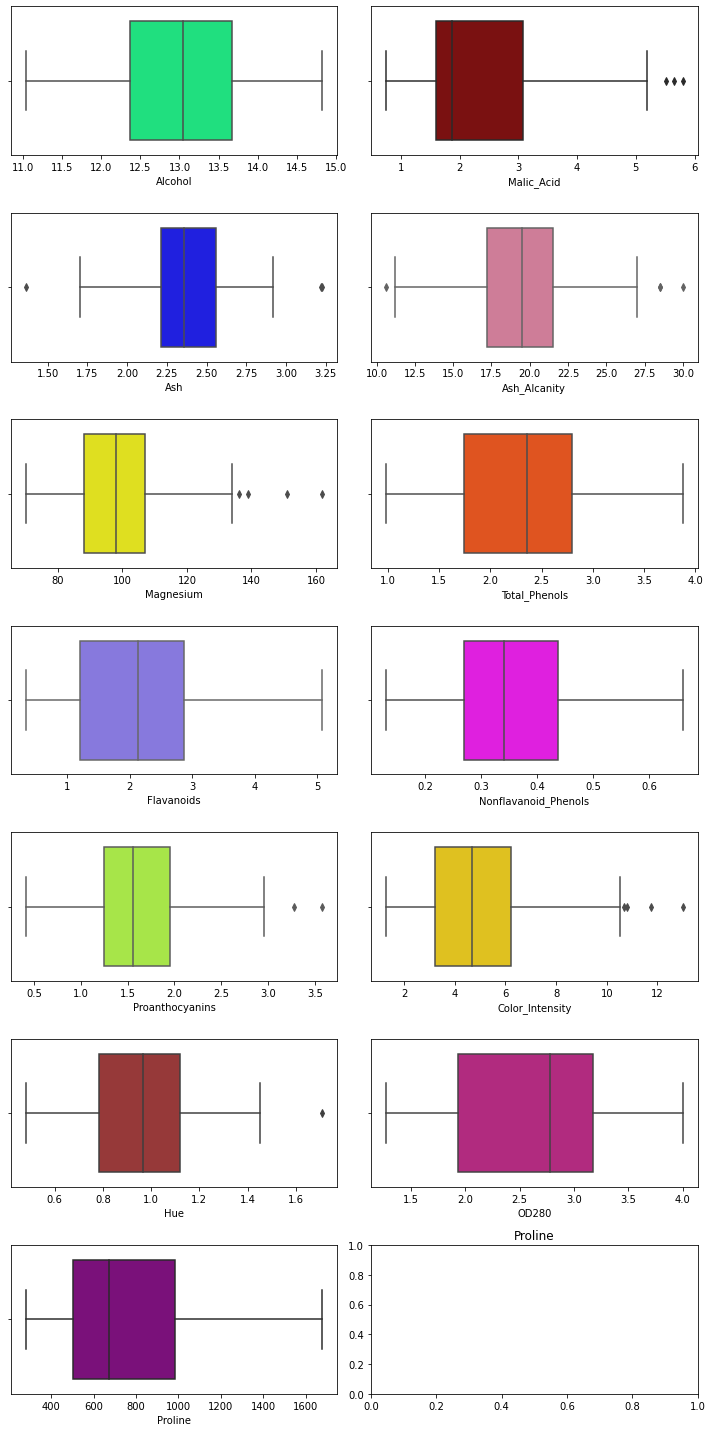

In [ ]:
# previewing the boxplots of each variable
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize = (10, 20))

cols = df.columns.to_list()
colors = ['#00FF7F', '#8B0000', '#0000FF', '#DB7093', '#FFFF00', '#FF4500', '#7B68EE', '#FF00FF',
          '#ADFF2F', '#FFD700', '#A52A2A', '#C71585', '#8B008B']

for col, color, ax in zip(cols, colors, axes.flatten()):
    sns.boxplot(df[col], ax = ax, color = color)
    plt.title(col)
    
plt.tight_layout()

Provide your interpretations.

Malic acid, Hue, Color intensity, Ash, Ash Alcalinity, MAgnesium and Proanthocyanins contain a few outliers.

Most of the variables have a normal distribution with Malic Acid,Magnesium and Proline have right skew.

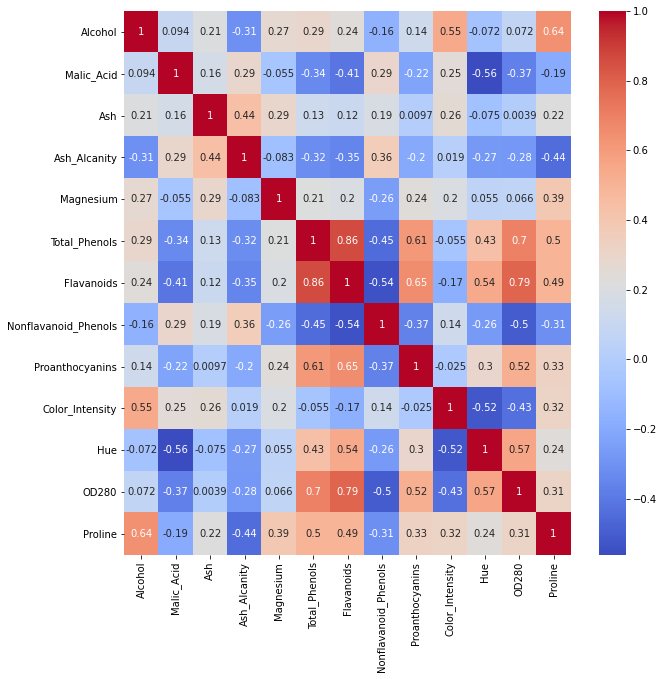

In [ ]:
# previewing the correlations between the variables
corr = df.corr()

plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

What do you notice?

There is correlation between some of the variables, with Flavanoids and OD280 haveing the hightest corrlation with a value of 0.79

## <font color='#2F4F4F'>4. Data Modeling</font>

In [ ]:
# set all the features into X
X = df.iloc[:,].values

X.shape

(178, 13)

In [ ]:
# scale our features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

### 4.1 KMeans Clustering

In [ ]:
# fitting KMeans with 5 clusters
from sklearn.cluster import KMeans

kmeans = KMeans(5, random_state=0)
kmeans.fit(X)

# getting the cluster labels
kmeans.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 4, 4, 0, 2, 4, 2,
       0, 0, 4, 0, 4, 2, 4, 3, 2, 0, 0, 4, 0, 2, 0, 0, 4, 1, 2, 0, 4, 4,
       4, 4, 4, 4, 4, 2, 2, 3, 4, 0, 2, 2, 0, 0, 2, 0, 0, 4, 0, 4, 0, 2,
       2, 2, 4, 4, 4, 4, 0, 4, 1, 0, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

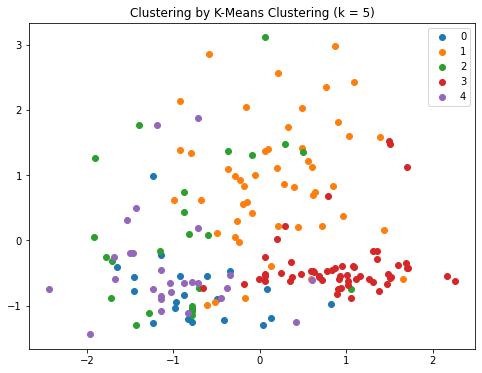

In [ ]:
# getting the KMeans scatter plot
kmeans_pred = kmeans.labels_
kmeans_clust = np.unique(kmeans_pred)

plt.figure(figsize = (8, 6))
for cluster in kmeans_clust:
    row_ix = np.where(kmeans_pred == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)
    
plt.title("Clustering by K-Means Clustering (k = 5)")
plt.legend()
plt.show()

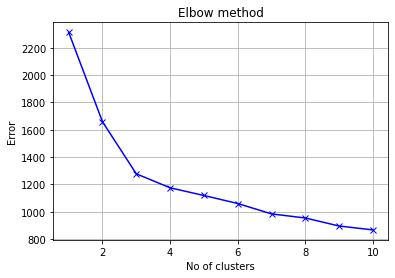

In [ ]:
# getting the optimum value of k for our KMeans model using the Elbow Method

# Creating an empty list, to place the SSE
Error = []

# Next we run the Kmeans algorithm sevral times lets say 11, and using a for loop, we append the values of SSE to the Error list
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
    
# Next plot the graph of No of clusters vs Error
plt.plot(range(1, 11), Error, 'bx-')
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.grid(True);

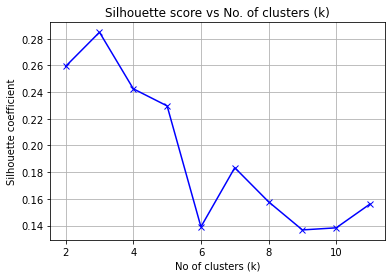

In [ ]:
# visualizing the distribution of errors per number of clusters

# Using Silhouette Analysis
from sklearn.metrics import silhouette_score
silhouette = [] # list of separation distance between the resulting clusters for each value of k 

K = range(2, 12)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X) 
    silhouette.append(silhouette_score(X, kmeans.labels_))

# Ploting the graph
plt.plot(range(2, 12), silhouette, 'bx-')
plt.title('Silhouette score vs No. of clusters (k)')
plt.xlabel('No of clusters (k)')
plt.ylabel('Silhouette coefficient')
plt.grid(True);

From the above Elbow Method, what cluster number is ideal?

From the elbow graph, a cluster of k = 3 is ideal.

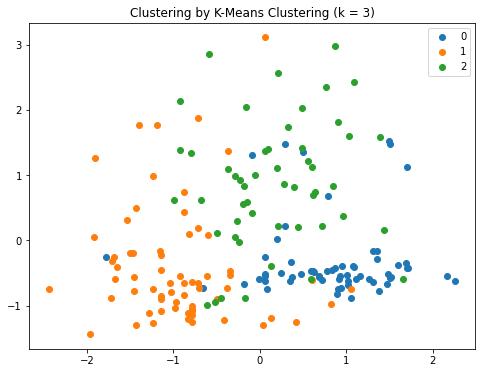

In [ ]:
# if needed, improve your model here and visualize it
# In our case we used k=5, hence we are to redo the clusters with k=3

# fitting KMeans with 3 clusters
kmeans = KMeans(3, random_state=0)
kmeans.fit(X)

# getting the KMeans scatter plot
kmeans_pred = kmeans.labels_
kmeans_clust = np.unique(kmeans_pred)

plt.figure(figsize = (8, 6))
for cluster in kmeans_clust:
    row_ix = np.where(kmeans_pred == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)
    
plt.title("Clustering by K-Means Clustering (k = 3)")
plt.legend()
plt.show()

Does the visualization of your model with the new value of k look better than the original one?

In [ ]:
# add these cluster labels to our dataset
df['kmeans_cluster_group'] = kmeans.labels_

# previewing a sample of our dataset
df.sample(10)

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
87     11.65        1.67  2.62          26.0         88           1.92   
120    11.45        2.40  2.42          20.0         96           2.90   
112    11.76        2.68  2.92          20.0        103           1.75   
79     12.70        3.87  2.40          23.0        101           2.83   
150    13.50        3.12  2.62          24.0        123           1.40   
135    12.60        2.46  2.20          18.5         94           1.62   
63     12.37        1.13  2.16          19.0         87           3.50   
139    12.84        2.96  2.61          24.0        101           2.32   
83     13.05        3.86  2.32          22.5         85           1.65   
134    12.51        1.24  2.25          17.5         85           2.00   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
87         1.61                  0.40             1.34             2.60  1.36   
120        2.79                  0.32             1.83             3.25  0.80   
112        2.03                  0.60             1.05             3.80  1.23   
79         2.55                  0.43             1.95             2.57  1.19   
150        1.57                  0.22             1.25             8.60  0.59   
135        0.66                  0.63             0.94             7.10  0.73   
63         3.10                  0.19             1.87             4.45  1.22   
139        0.60                  0.53             0.81             4.92  0.89   
83         1.59                  0.61             1.62             4.80  0.84   
134        0.58                  0.60             1.25             5.45  0.75   

     OD280  Proline  kmeans_cluster_group  
87    3.21      562                     1  
120   3.39      625                     1  
112   2.50      607                     1  
79    3.13      463                     1  
150   1.30      500                     2  
135   1.58      695                     2  
63    2.87      420                     1  
139   2.15      590                     2  
83    2.01      515                     2  
134   1.51      650                     2

### 4.2 Hierarchical Agglomerative Clustering

In [ ]:
# fitting agglomerative clustering with 5 clusters
from sklearn.cluster import AgglomerativeClustering as AC
agglo_clusterer = AC().fit(X)


# get the labels
labels = agglo_clusterer.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

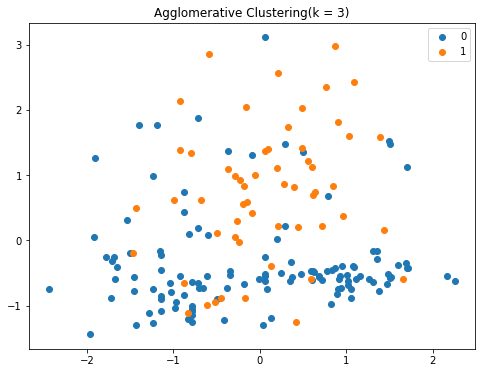

In [ ]:
# Creating a scatter plot of the cluster analysis
agglo_clust = np.unique(labels)

plt.figure(figsize = (8, 6))
for cluster in agglo_clust:
    row_ix = np.where(labels == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)
    
plt.title("Agglomerative Clustering")
plt.legend()
plt.show()

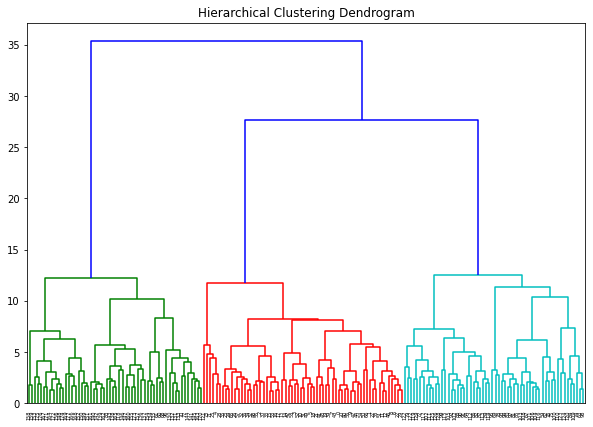

In [ ]:
# creating a dendrogram of our agglomerative clustering analysis
from scipy.cluster import hierarchy

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

What an you deduce from the dendrogram?
By drawing a line perpendicular to the largest vertical distance that doesn’t intersect any of the other clusters, the best obtimal cluster is three.

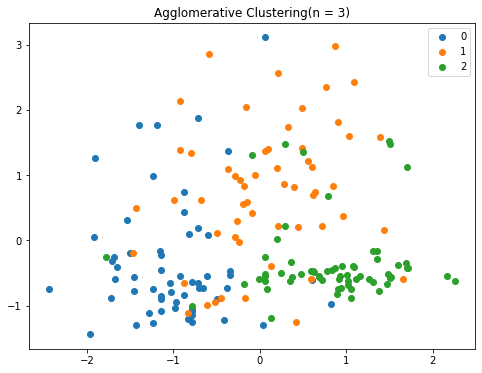

In [ ]:
# improve your agglomerative clustering model
agglo_new = AC(n_clusters=3, affinity='euclidean', linkage='ward').fit(X)
labels = agglo_new.labels_
#plotting the new cluster
agglo_clust = np.unique(labels)

plt.figure(figsize = (8, 6))
for cluster in agglo_clust:
    row_ix = np.where(labels == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)
    
plt.title("Agglomerative Clustering(n = 3)")
plt.legend()

Is your agglomerative model with a new value for k better than the first one?
Yes

In [ ]:
# adding to our dataset
df['agglo_clust'] = labels

# previewing a sample of our dataset
df.sample(10)

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
1      13.20        1.78  2.14          11.2        100           2.65   
145    13.16        3.57  2.15          21.0        102           1.50   
55     13.56        1.73  2.46          20.5        116           2.96   
82     12.08        1.13  2.51          24.0         78           2.00   
12     13.75        1.73  2.41          16.0         89           2.60   
7      14.06        2.15  2.61          17.6        121           2.60   
158    14.34        1.68  2.70          25.0         98           2.80   
41     13.41        3.84  2.12          18.8         90           2.45   
119    12.00        3.43  2.00          19.0         87           2.00   
131    12.88        2.99  2.40          20.0        104           1.30   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
1          2.76                  0.26             1.28             4.38  1.05   
145        0.55                  0.43             1.30             4.00  0.60   
55         2.78                  0.20             2.45             6.25  0.98   
82         1.58                  0.40             1.40             2.20  1.31   
12         2.76                  0.29             1.81             5.60  1.15   
7          2.51                  0.31             1.25             5.05  1.06   
158        1.31                  0.53             2.70            13.00  0.57   
41         2.68                  0.27             1.48             4.28  0.91   
119        1.64                  0.37             1.87             1.28  0.93   
131        1.22                  0.24             0.83             5.40  0.74   

     OD280  Proline  kmeans_cluster_group  agglo_clust  
1     3.40     1050                     0            2  
145   1.68      830                     2            1  
55    3.03     1120                     0            2  
82    2.72      630                     1            0  
12    2.90     1320                     0            2  
7     3.58     1295                     0            2  
158   1.96      660                     2            1  
41    3.00     1035                     0            2  
119   3.05      564                     1            0  
131   1.42      530                     2            1

## <font color='#2F4F4F'>5. Summary of Findings</font>

We found out that the initial K-means Clusters as five was not ideal, and th k=3 was the obtimal number of clusters. To confirm this, the obtimal number of clusters obtained from the dendrogram of our agglomerative clustering analysis was 3

## <font color='#2F4F4F'>6. Recommendations</font>


To improve the data collections on the variables with outlies,(Malic acid, Hue, Color intensity, Ash, Ash Alcalinity, MAgnesium and Proanthocyanins0. 

To collect more data obalance variables Malic Acid,Magnesium and Proline.

## <font color='#2F4F4F'>7. Challenging your Solution</font>

#### a) Did we have the right question?
Yes

#### b) Did we have the right data?
Yes

#### c) What can be done to improve the solution?
- We could try removing outliers and highly correlated variables and seeing if those would imporve our solution.
- We could also look into other clustering methods.
